In [1]:
#Predict dataset using 3 regression models
#Lasso #Ridge #Elastic Net

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
path = 'ENB2012_data.csv'
enb = pd.read_csv(path)
enb.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2,Unnamed: 9,Unnamed: 10
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28,NaN,NaN


In [4]:
enb.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2,Unnamed: 9,Unnamed: 10
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,17.11,NaN,NaN
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.61,NaN,NaN
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.03,NaN,NaN
768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
enb.drop([768,769], inplace=True)

In [6]:
enb.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [7]:
enb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y2      768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [17]:
enb.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


In [8]:
enb['Y2'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64

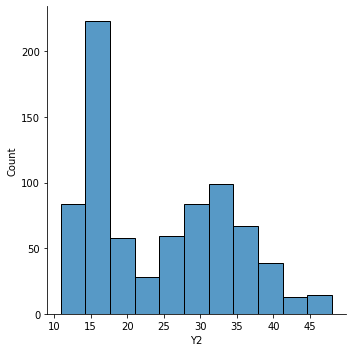

In [9]:
y2_dist = sns.displot(enb['Y2'])

In [10]:
print('Skewness: %f' % enb['Y2'].skew())


Skewness: 0.395992


In [11]:
norm_enb = StandardScaler().fit_transform(enb)
norm_enb

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.76044698,
        -1.81457514, -0.34266569],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.78654401],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.83913623],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.2440492 ,
         1.41133622, -0.9001432 ]])

In [12]:
#Lasso Regression
def L1(X, Y, W, alpha=1):
    sum_w = 0
    for i in range(0,len(W)):
        sum_w = sum_w + abs(W[i])
    cost = np.dot((np.dot(X,W) - Y).T, np.dot(X,W) - Y)/len(Y) + alpha*sum_w
    return cost

#Ridge Regression
def L2(X, Y, W, alpha=1):
    sum_w = 0
    for i in range(0,len(W)):
        sum_w = sum_w + W[i]**2
    cost = np.dot((np.dot(X,W) - Y).T, np.dot(X,W) - Y)/len(Y) + alpha*sum_w
    return cost

#Elastic
def Elastic(X,Y,W,alpha):
    
    sum_w1 = 0
    sum_w2 = 0
    for i in range(0,len(W)):
        sum_w1 = sum_w1 + W[i]**2
        sum_w2 = sum_w2 + abs(W[i])
    cost = np.dot((np.dot(X,W) - Y).T, np.dot(X,W) - Y)/len(Y) + alpha*sum_w1 + (1-alpha)*sum_w2
    return cost
        
#gradiant descent from Lasso
def gradient_L1(X,Y,W, alpha=1):
    s = np.zeros((X.shape[1],1))
    for i in range(0,len(Y)):
        for j in range(0,len(W)):
            s[j] += (-2/len(Y))*(Y[i] - np.dot(X[i,:],W))*X[i,j] + alpha*np.sign(W[j])
    return s

#gradiant descent from Ridge
def gradient_L2(X,Y,W, alpha=1):
    s = np.zeros((X.shape[1],1))
    for i in range(0,len(Y)):
        for j in range(0,len(W)):
            s[j] += (-2/len(Y))*(Y[i] - np.dot(X[i,:],W))*X[i,j] + 2*alpha*W[j]
    return s

#gradient descent from Elastic
def gradient_E(X,Y,W,alpha=0.5):
    s = np.zeros((X.shape[1],1))
    for i in range(0,len(Y)):
        for j in range(0,len(W)):
            s[j] += (-2/len(Y))*(Y[i] - np.dot(X[i,:],W))*X[i,j] + alpha*np.sign(W[j]) + (1-alpha)*2*W[j]
    return s

In [13]:
X = norm_enb[:,0:8]
Y = norm_enb[:,8]
Y = Y.reshape(len(Y),1)

def predict(X,Y,W):
    Xb = np.c_[np.ones((len(Y),1)),X]
    return np.dot(Xb,W)

def mse(Y,Y_predict):
    n = len(Y)
    return round(((Y-Y_predict)**2).sum()/n,3)

def regression(X, Y, W, step, iterations, mode=1 ,alpha=1):

    cost_record = np.zeros((iterations,1))
    for iter in range(0,iterations):
        
        if mode == 1:
            s = gradient_L1(X,Y,W,alpha)
        elif mode == 2:
            s = gradient_L2(X,Y,W,alpha)
        else:
            s = gradient_E(X,Y,W,alpha)
        
        #update new W
        for k in range(0,len(W)):
            W[k] = W[k] - step*s[k]/len(Y)
            
        #update cost based on new W
        if mode == 1:
            cost_record[iter] = L1(X,Y,W,alpha)
        elif mode == 2:
            cost_record[iter] = L2(X,Y,W,alpha)
        else:
            cost_record[iter] = Elastic(X,Y,W,alpha)
        
        return W, cost_record

In [14]:
#train-test model
def train_L1(X,Y,step=0.01,alpha=0.2,iterations=100):
    
    W = np.ones((X.shape[1]+1,1))
    Xb = np.c_[np.ones((len(Y),1)),X]

    W_train, cost_history = regression(Xb,Y,W,step,iterations,alpha)

    return W_train, cost_history

def train_L2(X,Y,step=0.01,alpha=0.2,iterations=100):

    W = np.ones((X.shape[1]+1,1))
    Xb = np.c_[np.ones((len(Y),1)),X]
    
    mode = 2
    W_train, cost_history = regression(Xb,Y,W,step,iterations,mode,alpha)
    
    return W_train, cost_history

def train_Elastic(X,Y,step=0.01,alpha=0.2,iterations=100):
    
    W = np.ones((X.shape[1]+1,1))
    Xb = np.c_[np.ones((len(Y),1)),X]

    mode = 3
    W_train, cost_history = regression(Xb,Y,W,step,iterations,mode,alpha)
    
    return W_train, cost_history

def test_model(X,Y,W):
    
    Y_pred = predict(X,Y,W)
    return mse(Y,Y_pred)

In [15]:
#validate performance using MSE
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

def k_validate(norm_data, number_run):
    
    model1 = np.zeros((number_run,1)) #L1 model
    model2 = np.zeros((number_run,1)) #L2 model
    model3 = np.zeros((number_run,1)) #Elastic model
    
    for k in range(0,number_run): 
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.9167, random_state=42)
        #train model
        #train_test_L1(X,Y,step=0.01,alpha=0.2,iterations=100)
        W_train1, cost_history1 = train_L1(X_train,Y_train)
        W_train2, cost_history2 = train_L2(X_train,Y_train)
        W_train3, cost_history3 = train_Elastic(X_train,Y_train)
        #test model
        model1[k] = test_model(X_test,Y_test,W_train1)
        model2[k] = test_model(X_test,Y_test,W_train2)
        model3[k] = test_model(X_test,Y_test,W_train3)
        
    #calculate avg
    avg1 = np.mean(model1, axis = 0)
    avg2 = np.mean(model2, axis = 0)
    avg3 = np.mean(model3, axis = 0)
        
    #print("avg1: ",avg1," ", "avg2: ",avg2," ","avg3: ",avg3)
    models = {"Lasso": avg1, "Ridge": avg2, "ElasticNet": avg3}
 
    minimum = 0
    
    if models["Lasso"] < models["Ridge"]:
        minimum = models["Lasso"]
        if minimum < models["ElasticNet"]:
            print("model ",get_keys_from_value(models,minimum)," has the best performance with average MSE of ",minimum)
        else:
            minimum = models["ElasticNet"]
            print("model ElasticNet has the best performance with average MSE of ",minimum)
    else:
        minimum = models["Ridge"]
        if minimum < models["ElasticNet"]:
            print("model ",get_keys_from_value(models,minimum)," has the best performance with average MSE of ",minimum)
        else:
            minimum = models["ElasticNet"]
            print("model ElasticNet has the best performance with average MSE of ",minimum)
    

In [16]:
#k_validate(norm_enb, 5) # 5-fold validation
k_validate(norm_enb,5)

model ElasticNet has the best performance with average MSE of  [4.345]
